In [1]:
import pandas as pd
import numpy as np
import ssl

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from collections import namedtuple, deque

In [2]:
file_path = 'https://www.cryptodatadownload.com/cdd/gemini_BTCUSD_day.csv'

ssl._create_default_https_context = ssl._create_unverified_context

bitcoin_df = pd.read_csv(file_path, skiprows=1)

In [3]:
bitcoin_df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1623902400000,2021-06-17 04:00:00,BTCUSD,38875.00,39575.03,37374.49,37983.31,2325.519775
1,1623816000000,2021-06-16 04:00:00,BTCUSD,40043.69,40490.02,38059.01,38875.00,2783.604082
2,1623729600000,2021-06-15 04:00:00,BTCUSD,40429.38,41380.02,39503.90,40043.69,2687.612479
3,1623643200000,2021-06-14 04:00:00,BTCUSD,38988.50,41060.77,38807.50,40429.38,2719.454522
4,1623556800000,2021-06-13 04:00:00,BTCUSD,34877.30,39816.72,34792.66,38988.50,2406.825275


In [4]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date']).dt.date

In [5]:
bitcoin_df.reset_index()

,index,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,0,1623902400000,2021-06-17,BTCUSD,38875.00,39575.03,37374.49,37983.31,2325.519775
1,1,1623816000000,2021-06-16,BTCUSD,40043.69,40490.02,38059.01,38875.00,2783.604082
2,2,1623729600000,2021-06-15,BTCUSD,40429.38,41380.02,39503.90,40043.69,2687.612479
3,3,1623643200000,2021-06-14,BTCUSD,38988.50,41060.77,38807.50,40429.38,2719.454522
4,4,1623556800000,2021-06-13,BTCUSD,34877.30,39816.72,34792.66,38988.50,2406.825275
...,...,...,...,...,...,...,...,...,...
2075,2075,1444622400,2015-10-12,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2076,2076,1444536000,2015-10-11,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2077,2077,1444449600,2015-10-10,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2078,2078,1444363200,2015-10-09,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [6]:
bitcoin_df.drop(labels=['Unix Timestamp', 'Symbol'], axis=1, inplace=True)

In [7]:
bitcoin_df = bitcoin_df.set_index('Date')

In [8]:
bitcoin_df = bitcoin_df.sort_index()

In [9]:
bitcoin_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-08,0.00,245.00,0.00,243.60,34.754703
2015-10-09,243.60,249.97,243.60,245.51,61.587068
2015-10-10,245.51,246.30,244.60,246.30,30.870549
2015-10-11,246.30,249.50,245.96,248.98,22.747091
2015-10-12,248.98,248.98,245.75,245.75,71.047743


<AxesSubplot:xlabel='Date'>

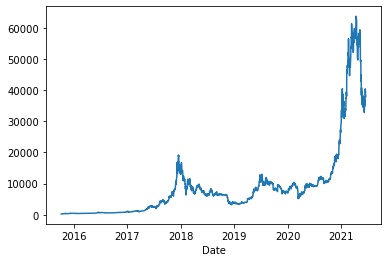

In [10]:
bitcoin_df['Close'].plot()

In [11]:
bitcoin_subset = bitcoin_df.loc[datetime.date(year=2017,month=7,day=1):]
bitcoin_subset.head

<bound method NDFrame.head of                 Open      High       Low     Close        Volume
Date                                                            
2017-07-01   2430.87   2500.00   2375.03   2399.21   5676.890133
2017-07-02   2399.21   2541.87   2390.00   2490.60   4935.453176
2017-07-03   2490.60   2631.32   2481.33   2625.06   6839.433207
2017-07-04   2625.06   2631.00   2549.47   2578.16   4221.348549
2017-07-05   2578.16   2650.00   2550.01   2623.05  19838.430004
...              ...       ...       ...       ...           ...
2021-06-13  34877.30  39816.72  34792.66  38988.50   2406.825275
2021-06-14  38988.50  41060.77  38807.50  40429.38   2719.454522
2021-06-15  40429.38  41380.02  39503.90  40043.69   2687.612479
2021-06-16  40043.69  40490.02  38059.01  38875.00   2783.604082
2021-06-17  38875.00  39575.03  37374.49  37983.31   2325.519775

[1448 rows x 5 columns]>

In [12]:
X = list(bitcoin_subset["Close"])
X = [float(x) for x in X]

In [13]:
validation_size = 0.3

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from IPython.core.debugger import set_trace


class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size 
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        #self.epsilon_decay = 0.9

        self.model = load_model(model_name) if is_eval else self._model()

    #Deep Q Learning model
    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.001))
        return model
    
 
    def act(self, state): 
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)        
        options = self.model.predict(state)
        #set_trace()
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        
        for state, action, reward, next_state, done in mini_batch:
            target = reward # reward or Q at time t    
            #set_trace()
            if not done:
                #set_trace()
                #max of the array of the predicted. 
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])     
                
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [17]:
# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# returns the sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# returns an an n-day state representation ending at time t
def getState(data, t, n):    
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])

# Plots the behavior of the output
def plot_behavior(data_input, states_buy, states_sell, profit, name):
    fig = plt.figure(figsize = (15,5))
    plt.plot(data_input, color='tab:grey', lw=2.)
    plt.plot(data_input, '^', markersize=10, color='tab:green', label = 'Buying signal', markevery = states_buy)
    plt.plot(data_input, 'v', markersize=10, color='tab:red', label = 'Selling signal', markevery = states_sell)
    plt.title('Total gains: %f'%(profit))
    plt.legend()
    plt.savefig('output'+name+'.png')
    plt.show()

Running episode 0/10
Buy: $2399.21
Sell: $2490.60 | Profit: $91.39
Buy: $2625.06
Sell: $2578.16 | Profit: -$46.90
Buy: $2411.64
Buy: $2317.13
Sell: $2095.00 | Profit: -$316.64
Buy: $2166.67
Sell: $2330.01 | Profit: $12.88
Sell: $2709.99 | Profit: $543.32
Buy: $2755.54
Sell: $2748.73 | Profit: -$6.81
Buy: $2864.56
Sell: $2731.16 | Profit: -$133.40
Buy: $3231.49
Sell: $3447.19 | Profit: $215.70
Buy: $3381.56
Sell: $3328.91 | Profit: -$52.65
Buy: $3659.14
Buy: $3975.17
Sell: $4078.46 | Profit: $419.32
Buy: $4266.98
Buy: $4079.82
Sell: $3829.11 | Profit: -$146.06
Buy: $4100.47
Sell: $4132.23 | Profit: -$134.75
Sell: $4354.29 | Profit: $274.47
Buy: $4371.25
Sell: $4369.49 | Profit: $269.02
Sell: $4287.24 | Profit: -$84.01
Buy: $4599.17
Buy: $4760.02
Sell: $4658.10 | Profit: $58.93
Sell: $4549.08 | Profit: -$210.94
Buy: $4124.44
Buy: $4219.66
Sell: $4336.68 | Profit: $212.24
Sell: $4284.69 | Profit: $65.03
Buy: $3956.08
Buy: $3800.01
Sell: $3359.98 | Profit: -$596.10
Sell: $3709.85 | Profit:

Sell: $8559.71 | Profit: -$76.82
Sell: $8310.20 | Profit: -$604.72
Sell: $8286.66 | Profit: -$854.34
Sell: $8346.01 | Profit: -$301.67
Buy: $8605.01
Buy: $8877.81
Buy: $8787.27
Buy: $8882.25
Buy: $9049.04
Buy: $9120.00
Buy: $8757.45
Buy: $8074.97
Buy: $7908.79
Buy: $7926.00
Sell: $7656.57 | Profit: -$948.44
Sell: $5301.14 | Profit: -$3576.67
Sell: $5607.46 | Profit: -$3179.81
Sell: $5168.42 | Profit: -$3713.83
Sell: $5258.08 | Profit: -$3790.96
Sell: $5347.41 | Profit: -$3772.59
Sell: $5415.14 | Profit: -$3342.31
Sell: $5305.00 | Profit: -$2769.97
Sell: $6169.00 | Profit: -$1739.79
Sell: $6262.57 | Profit: -$1663.43
--------------------------------
Total Profit: -$17445.86
--------------------------------


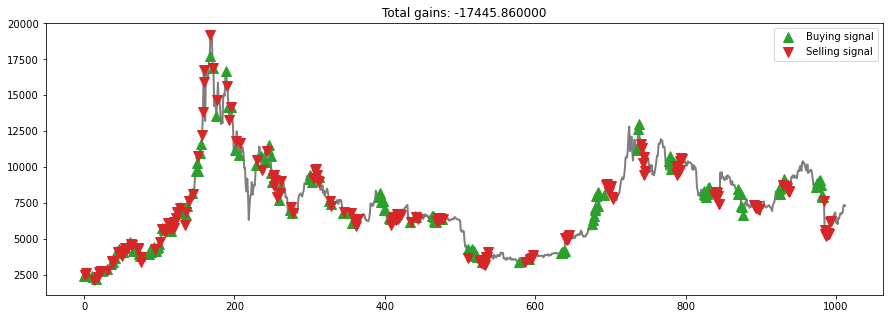

INFO:tensorflow:Assets written to: model_ep0/assets
Running episode 1/10
Buy: $2492.08
Buy: $2565.49
Buy: $2506.57
Buy: $2313.48
Buy: $2264.37
Buy: $2411.64
Buy: $2317.13
Buy: $2095.00
Buy: $2015.91
Buy: $1952.26
Sell: $2166.67 | Profit: -$325.41
Sell: $2357.18 | Profit: -$208.31
Sell: $2330.01 | Profit: -$176.56
Sell: $2731.27 | Profit: $417.79
Sell: $2709.99 | Profit: $445.62
Sell: $2826.35 | Profit: $414.71
Sell: $2755.54 | Profit: $438.41
Sell: $2748.73 | Profit: $653.73
Sell: $2503.77 | Profit: $487.86
Sell: $2544.32 | Profit: $592.06
Buy: $4287.24
Buy: $4385.31
Buy: $4599.17
Buy: $4625.01
Buy: $4760.02
Sell: $4828.33 | Profit: $541.09
Sell: $4658.10 | Profit: $272.79
Sell: $4549.08 | Profit: -$50.09
Sell: $4124.44 | Profit: -$500.57
Sell: $4483.32 | Profit: -$276.70
Buy: $4437.48
Buy: $4622.78
Buy: $4773.10
Buy: $4738.91
Buy: $4846.99
Buy: $5712.47
Buy: $5667.11
Buy: $5774.59
Sell: $5604.34 | Profit: $1166.86
Sell: $5648.09 | Profit: $1025.31
Sell: $5494.42 | Profit: $721.32
Sell

Sell: $10078.82 | Profit: $658.81
Sell: $9724.18 | Profit: $306.71
Sell: $10299.99 | Profit: $1046.44
Sell: $10407.84 | Profit: $1045.81
Sell: $10250.00 | Profit: $975.25
Sell: $10275.98 | Profit: $1068.20
Buy: $7656.57
Sell: $5301.14 | Profit: -$2355.43
Buy: $5347.41
Buy: $5415.14
Buy: $5305.00
Buy: $6169.00
Buy: $6262.57
Buy: $6362.46
Buy: $5963.72
Buy: $6560.95
Buy: $6577.72
Buy: $6747.55
Sell: $6821.95 | Profit: $1474.54
Sell: $6127.86 | Profit: $712.72
Sell: $6219.79 | Profit: $914.79
Sell: $6011.50 | Profit: -$157.50
Sell: $6450.00 | Profit: $187.43
Sell: $6383.69 | Profit: $21.23
Sell: $6623.92 | Profit: $660.20
Sell: $6787.40 | Profit: $226.45
Sell: $6702.98 | Profit: $125.26
Sell: $6802.53 | Profit: $54.98
--------------------------------
Total Profit: $16302.43
--------------------------------


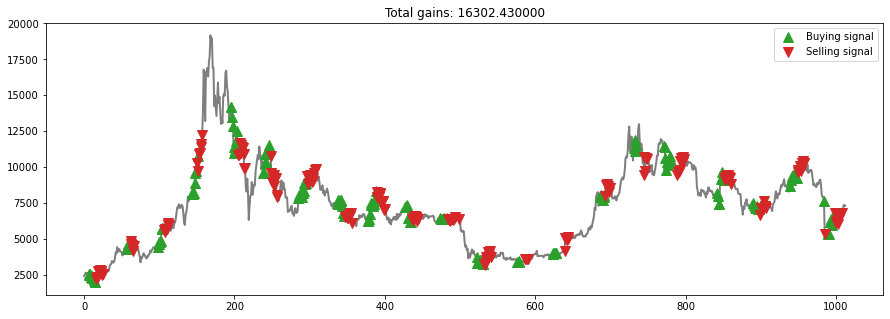

Running episode 2/10
Buy: $2748.73
Buy: $2503.77
Buy: $2544.32
Buy: $2673.34
Sell: $2693.67 | Profit: -$55.06
Buy: $2701.27
Buy: $2715.67
Buy: $2864.56
Buy: $2731.16
Buy: $2719.31
Buy: $2783.59
Sell: $3092.25 | Profit: $588.48
Sell: $3203.30 | Profit: $658.98
Sell: $3231.49 | Profit: $558.15
Sell: $3447.19 | Profit: $745.92
Sell: $3381.56 | Profit: $665.89
Sell: $3328.91 | Profit: $464.35
Sell: $3421.45 | Profit: $690.29
Sell: $3659.14 | Profit: $939.83
Sell: $4047.47 | Profit: $1263.88
Buy: $3359.98
Buy: $3709.85
Buy: $3657.61
Buy: $3798.74
Buy: $3989.64
Buy: $3877.66
Buy: $3820.00
Buy: $3694.23
Sell: $3616.10 | Profit: $256.12
Sell: $3780.46 | Profit: $70.61
Sell: $3748.76 | Profit: $91.15
Sell: $3906.72 | Profit: $107.98
Sell: $3933.36 | Profit: -$56.28
Sell: $4183.45 | Profit: $305.79
Sell: $4058.73 | Profit: $238.73
Sell: $4182.89 | Profit: $488.66
Buy: $6850.00
Buy: $7196.58
Buy: $7148.63
Buy: $7400.00
Buy: $7190.00
Buy: $7134.31
Buy: $7349.50
Buy: $7345.01
Buy: $7253.45
Buy: $67

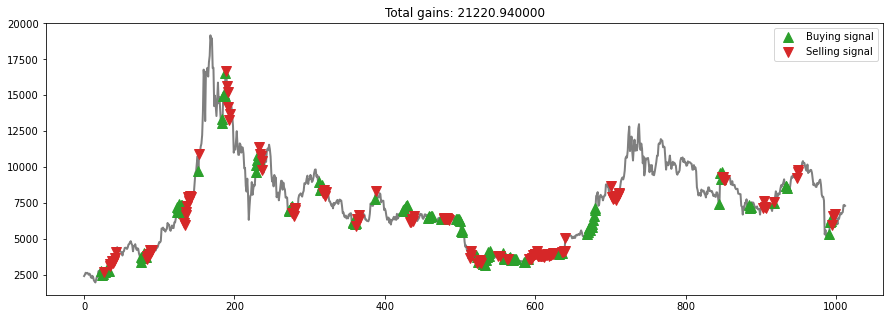

INFO:tensorflow:Assets written to: model_ep2/assets
Running episode 3/10
Buy: $2357.18
Buy: $2330.01
Buy: $2731.27
Buy: $2709.99
Buy: $2826.35
Sell: $2693.67 | Profit: $336.49
Sell: $2701.27 | Profit: $371.26
Sell: $2715.67 | Profit: -$15.60
Sell: $2864.56 | Profit: $154.57
Sell: $2731.16 | Profit: -$95.19
Buy: $4625.01
Buy: $4760.02
Buy: $4828.33
Buy: $4658.10
Sell: $4336.68 | Profit: -$288.33
Sell: $4284.69 | Profit: -$475.33
Sell: $3956.08 | Profit: -$872.25
Sell: $3800.01 | Profit: -$858.09
Buy: $4408.25
Buy: $4290.00
Buy: $4175.02
Sell: $4324.11 | Profit: -$84.14
Buy: $4362.14
Buy: $4437.48
Buy: $4622.78
Sell: $5648.09 | Profit: $1358.09
Sell: $5494.42 | Profit: $1319.40
Sell: $5624.10 | Profit: $1261.96
Sell: $5685.02 | Profit: $1247.54
Sell: $6098.72 | Profit: $1475.94
Buy: $7969.11
Buy: $7909.17
Buy: $8178.00
Buy: $10938.42
Buy: $10954.92
Buy: $11399.99
Buy: $11626.56
Sell: $12230.00 | Profit: $4260.89
Sell: $13812.76 | Profit: $5903.59
Sell: $16783.25 | Profit: $8605.25
Sell: 

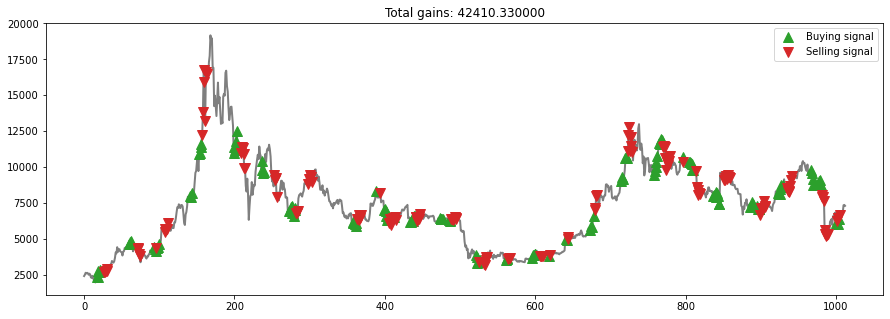

Running episode 4/10
Buy: $2748.73
Buy: $2503.77
Buy: $2544.32
Buy: $2673.34
Buy: $2693.67
Buy: $2701.27
Buy: $2715.67
Sell: $3092.25 | Profit: $343.52
Sell: $3203.30 | Profit: $699.53
Sell: $3231.49 | Profit: $687.17
Sell: $3447.19 | Profit: $773.85
Sell: $3381.56 | Profit: $687.89
Sell: $3328.91 | Profit: $627.64
Sell: $3421.45 | Profit: $705.78
Buy: $4549.08
Buy: $4124.44
Buy: $4483.32
Buy: $4284.69
Buy: $3956.08
Buy: $3800.01
Sell: $3359.98 | Profit: -$1189.10
Sell: $3709.85 | Profit: -$414.59
Sell: $3657.61 | Profit: -$825.71
Sell: $3798.74 | Profit: -$485.95
Sell: $3989.64 | Profit: $33.56
Sell: $3877.66 | Profit: $77.65
Buy: $4622.78
Buy: $4773.10
Buy: $4738.91
Buy: $5604.34
Sell: $5648.09 | Profit: $1025.31
Sell: $5494.42 | Profit: $721.32
Sell: $5624.10 | Profit: $885.19
Sell: $5685.02 | Profit: $80.68
Buy: $5550.99
Sell: $5783.77 | Profit: $232.78
Buy: $7605.00
Buy: $7782.99
Buy: $7969.11
Sell: $8214.57 | Profit: $609.57
Sell: $8872.00 | Profit: $1089.01
Sell: $9591.76 | Prof

Sell: $10234.12 | Profit: $6437.86
Sell: $9636.47 | Profit: $5764.72
Sell: $10121.72 | Profit: $6325.18
Sell: $9708.52 | Profit: $5867.10
Sell: $10131.20 | Profit: $6333.96
Sell: $9466.06 | Profit: $5431.89
Sell: $9622.65 | Profit: $5641.85
Sell: $9424.51 | Profit: $5405.00
Sell: $9689.92 | Profit: $5676.92
Sell: $10020.96 | Profit: $6400.02
Sell: $10351.99 | Profit: $6710.92
Sell: $10790.16 | Profit: $7165.33
Sell: $10775.01 | Profit: $7254.76
Sell: $11589.84 | Profit: $7920.54
Sell: $11665.47 | Profit: $8070.69
Sell: $11620.00 | Profit: $8034.37
Sell: $11942.00 | Profit: $8316.08
Sell: $11856.76 | Profit: $8232.81
Sell: $11831.73 | Profit: $8134.29
Sell: $11372.66 | Profit: $7836.23
Sell: $11429.93 | Profit: $7894.91
Sell: $11375.00 | Profit: $7792.78
Sell: $10601.91 | Profit: $7066.32
Sell: $9815.49 | Profit: $6245.46
Sell: $10317.24 | Profit: $6745.24
Sell: $10306.38 | Profit: $6743.91
Sell: $10116.20 | Profit: $6646.32
Sell: $10409.68 | Profit: $7001.68
Sell: $10792.92 | Profit: $

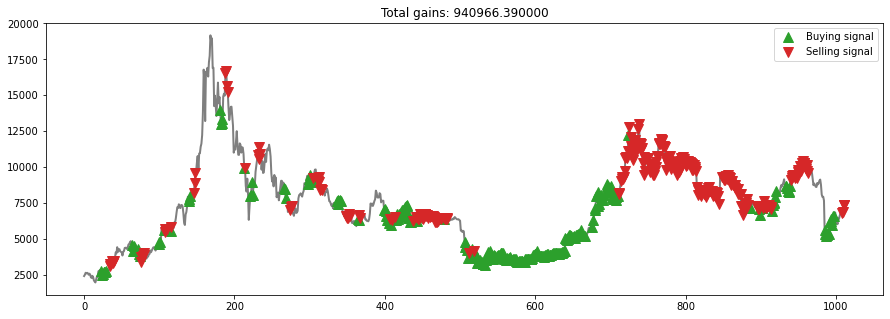

INFO:tensorflow:Assets written to: model_ep4/assets
Running episode 5/10
Buy: $2317.13
Buy: $2095.00
Buy: $2015.91
Buy: $1952.26
Buy: $2166.67
Buy: $2357.18
Buy: $2330.01
Buy: $2731.27
Buy: $2709.99
Sell: $2826.35 | Profit: $509.22
Sell: $2755.54 | Profit: $660.54
Sell: $2748.73 | Profit: $732.82
Sell: $2503.77 | Profit: $551.51
Sell: $2544.32 | Profit: $377.65
Sell: $2673.34 | Profit: $316.16
Sell: $2693.67 | Profit: $363.66
Sell: $2701.27 | Profit: -$30.00
Sell: $2715.67 | Profit: $5.68
Buy: $4132.23
Buy: $4354.29
Buy: $4371.25
Buy: $4369.49
Buy: $4287.24
Buy: $4385.31
Buy: $4599.17
Buy: $4625.01
Buy: $4760.02
Buy: $4828.33
Buy: $4658.10
Sell: $4617.89 | Profit: $485.66
Sell: $4337.81 | Profit: -$16.48
Sell: $4219.66 | Profit: -$151.59
Sell: $4336.68 | Profit: -$32.81
Sell: $4284.69 | Profit: -$2.55
Sell: $3956.08 | Profit: -$429.23
Sell: $3800.01 | Profit: -$799.16
Sell: $3359.98 | Profit: -$1265.03
Sell: $3709.85 | Profit: -$1050.17
Sell: $3657.61 | Profit: -$1170.72
Sell: $3798.74

Buy: $8474.64
Sell: $8477.41 | Profit: -$344.74
Buy: $8136.38
Sell: $8136.38 | Profit: -$630.91
Buy: $8106.03
Sell: $8106.03 | Profit: -$905.98
Buy: $7292.60
Sell: $7227.12 | Profit: -$1502.88
Buy: $6682.52
Sell: $7241.86 | Profit: -$1488.14
Buy: $7073.30
Buy: $7492.85
Buy: $7748.26
Buy: $7295.55
Buy: $7365.28
Buy: $7359.65
Buy: $7153.72
Buy: $7215.49
Buy: $7215.49
Buy: $7546.35
Buy: $7415.16
Buy: $7517.82
Buy: $7376.76
Buy: $7206.77
Buy: $7154.82
Buy: $7154.82
Buy: $7249.48
Buy: $7048.99
Buy: $7065.45
Buy: $7065.45
Buy: $6682.33
Buy: $7168.49
Buy: $7168.49
Buy: $7165.18
Buy: $7140.94
Buy: $7601.16
Buy: $7312.65
Buy: $7231.26
Buy: $7173.62
Buy: $7209.32
Buy: $7276.81
Buy: $7298.01
Buy: $7340.05
Buy: $7210.56
Buy: $7199.04
Buy: $7100.02
Buy: $6930.10
Buy: $7328.98
Buy: $7468.87
Buy: $7535.91
Buy: $7899.33
Buy: $8301.60
Buy: $7941.96
Buy: $7804.00
Buy: $8160.66
Buy: $8086.45
Buy: $8100.01
Buy: $8467.57
Buy: $8727.32
Buy: $8636.53
Buy: $8774.03
Buy: $8914.92
Buy: $9141.00
Buy: $8647.68
Bu

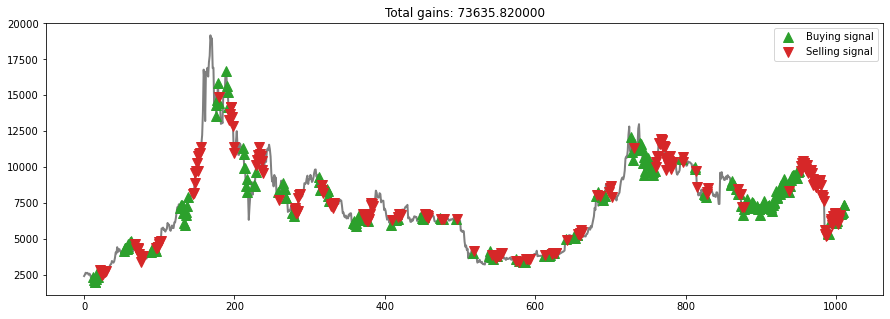

Running episode 6/10
Buy: $2399.21
Sell: $2490.60 | Profit: $91.39
Buy: $2095.00
Buy: $2015.91
Buy: $1952.26
Buy: $2166.67
Buy: $2357.18
Buy: $2330.01
Buy: $2731.27
Buy: $2709.99
Buy: $2826.35
Buy: $2755.54
Sell: $2748.73 | Profit: $653.73
Sell: $2503.77 | Profit: $487.86
Sell: $2544.32 | Profit: $592.06
Sell: $2673.34 | Profit: $506.67
Sell: $2693.67 | Profit: $336.49
Sell: $2701.27 | Profit: $371.26
Sell: $2715.67 | Profit: -$15.60
Sell: $2864.56 | Profit: $154.57
Sell: $2731.16 | Profit: -$95.19
Sell: $2719.31 | Profit: -$36.23
Buy: $4271.64
Sell: $4266.98 | Profit: -$4.66
Buy: $4100.47
Buy: $4132.23
Buy: $4354.29
Buy: $4371.25
Buy: $4369.49
Buy: $4287.24
Buy: $4385.31
Buy: $4599.17
Buy: $4625.01
Buy: $4760.02
Buy: $4828.33
Buy: $4658.10
Buy: $4549.08
Buy: $4124.44
Buy: $4483.32
Buy: $4506.06
Buy: $4617.89
Buy: $4337.81
Buy: $4219.66
Buy: $4336.68
Buy: $4284.69
Buy: $3956.08
Buy: $3800.01
Buy: $3359.98
Sell: $3709.85 | Profit: -$390.62
Sell: $3657.61 | Profit: -$474.62
Sell: $3798.7

Buy: $9633.77
Sell: $9771.76 | Profit: $137.99
Buy: $10419.11
Buy: $10574.37
Sell: $10346.12 | Profit: -$72.99
Buy: $10566.01
Sell: $10307.94 | Profit: -$266.43
Buy: $10311.07
Sell: $10083.83 | Profit: -$482.18
Sell: $10110.81 | Profit: -$200.26
Buy: $10250.00
Sell: $10213.55 | Profit: -$36.45
Buy: $9705.64
Buy: $8580.00
Buy: $8368.01
Buy: $8346.13
Buy: $8147.95
Buy: $8064.95
Sell: $8130.38 | Profit: -$1575.26
Sell: $8569.02 | Profit: -$10.98
Sell: $8293.00 | Profit: -$75.01
Sell: $8319.15 | Profit: -$26.98
Sell: $8157.99 | Profit: $10.04
Buy: $7970.35
Sell: $8071.61 | Profit: $6.66
Sell: $7952.75 | Profit: -$17.60
Buy: $9153.97
Buy: $9423.50
Buy: $9317.56
Buy: $9295.62
Sell: $9229.83 | Profit: $75.86
Sell: $8822.15 | Profit: -$601.35
Buy: $8767.29
Sell: $8730.00 | Profit: -$587.56
Sell: $8730.00 | Profit: -$565.62
Sell: $8756.62 | Profit: -$10.67
Buy: $7748.26
Sell: $7365.28 | Profit: -$382.98
Buy: $7153.72
Buy: $7215.49
Buy: $7546.35
Buy: $7415.16
Buy: $7517.82
Buy: $7376.76
Buy: $72

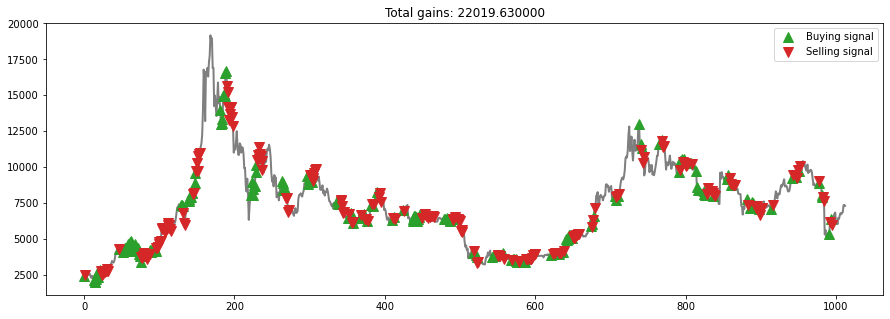

INFO:tensorflow:Assets written to: model_ep6/assets
Running episode 7/10
Buy: $2506.57
Buy: $2264.37
Sell: $2411.64 | Profit: -$94.93
Buy: $2317.13
Buy: $2095.00
Buy: $1952.26
Buy: $2166.67
Buy: $2357.18
Buy: $2330.01
Buy: $2731.27
Buy: $2709.99
Buy: $2826.35
Buy: $2748.73
Buy: $2503.77
Buy: $2544.32
Buy: $2731.16
Buy: $2719.31
Buy: $2783.59
Buy: $3092.25
Buy: $3203.30
Sell: $3231.49 | Profit: $967.12
Sell: $3447.19 | Profit: $1130.06
Sell: $3381.56 | Profit: $1286.56
Sell: $3328.91 | Profit: $1376.65
Sell: $3421.45 | Profit: $1254.78
Sell: $3659.14 | Profit: $1301.96
Sell: $4047.47 | Profit: $1717.46
Sell: $3975.17 | Profit: $1243.90
Sell: $4408.51 | Profit: $1698.52
Sell: $4078.46 | Profit: $1252.11
Sell: $4271.64 | Profit: $1522.91
Sell: $4266.98 | Profit: $1763.21
Sell: $4120.25 | Profit: $1575.93
Sell: $4079.82 | Profit: $1348.66
Sell: $4043.74 | Profit: $1324.43
Sell: $3829.11 | Profit: $1045.52
Sell: $4100.47 | Profit: $1008.22
Sell: $4132.23 | Profit: $928.93
Buy: $4219.66
Buy:

Buy: $8219.16
Buy: $7957.67
Buy: $7420.27
Sell: $7420.27 | Profit: -$494.05
Sell: $9600.00 | Profit: $1366.29
Sell: $9175.00 | Profit: $955.84
Sell: $9637.32 | Profit: $1679.65
Sell: $9302.20 | Profit: $1881.93
Buy: $7073.30
Buy: $7507.18
Buy: $7492.85
Buy: $7748.26
Sell: $7295.55 | Profit: $222.25
Sell: $7365.28 | Profit: -$141.90
Sell: $7359.65 | Profit: -$133.20
Sell: $7153.72 | Profit: -$594.54
Buy: $7376.76
Sell: $7154.82 | Profit: -$221.94
Buy: $7168.49
Sell: $7165.18 | Profit: -$3.31
Buy: $7312.65
Buy: $7173.62
Sell: $7298.01 | Profit: -$14.64
Buy: $7210.56
Buy: $7199.04
Buy: $7100.02
Buy: $6930.10
Buy: $7328.98
Buy: $7468.87
Buy: $7535.91
Buy: $7899.33
Buy: $8301.60
Buy: $7941.96
Buy: $7804.00
Buy: $8160.66
Sell: $8086.45 | Profit: $912.83
Sell: $8100.01 | Profit: $889.45
Sell: $8467.57 | Profit: $1268.53
Sell: $8727.32 | Profit: $1627.30
Sell: $8636.53 | Profit: $1706.43
Sell: $8774.03 | Profit: $1445.05
Sell: $8914.92 | Profit: $1446.05
Sell: $9141.00 | Profit: $1605.09
Sell:

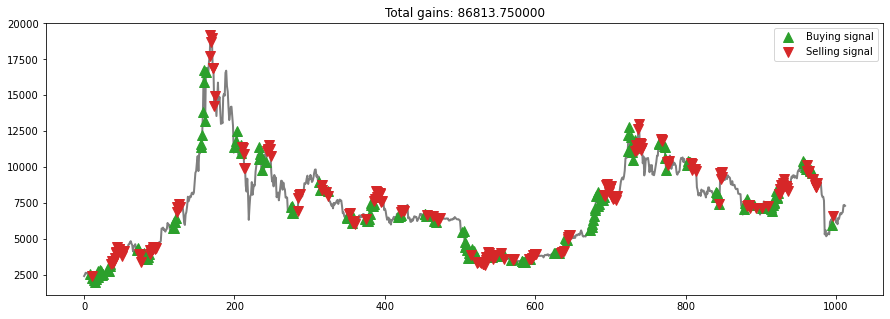

Running episode 8/10
Buy: $2490.60
Buy: $2625.06
Buy: $2578.16
Buy: $2623.05
Buy: $2590.63
Sell: $2492.08 | Profit: $1.48
Sell: $2506.57 | Profit: -$118.49
Sell: $2313.48 | Profit: -$264.68
Sell: $2264.37 | Profit: -$358.68
Sell: $2411.64 | Profit: -$178.99
Buy: $2317.13
Buy: $2095.00
Buy: $2015.91
Buy: $1952.26
Buy: $2166.67
Sell: $2357.18 | Profit: $40.05
Buy: $2330.01
Sell: $2731.27 | Profit: $636.27
Sell: $2709.99 | Profit: $694.08
Sell: $2826.35 | Profit: $874.09
Sell: $2755.54 | Profit: $588.87
Sell: $2748.73 | Profit: $418.72
Buy: $3829.11
Buy: $4100.47
Buy: $4132.23
Buy: $4354.29
Buy: $4371.25
Buy: $4369.49
Sell: $4599.17 | Profit: $770.06
Sell: $4760.02 | Profit: $659.55
Sell: $4828.33 | Profit: $696.10
Sell: $4658.10 | Profit: $303.81
Buy: $4549.08
Sell: $4124.44 | Profit: -$246.81
Buy: $4483.32
Sell: $4506.06 | Profit: $136.57
Buy: $4617.89
Sell: $4337.81 | Profit: -$211.27
Sell: $4219.66 | Profit: -$263.66
Sell: $4336.68 | Profit: -$281.21
Buy: $4175.02
Buy: $4324.11
Buy: $

Sell: $4023.05 | Profit: $274.02
Sell: $4088.03 | Profit: $367.70
Sell: $4084.40 | Profit: $41.53
Sell: $4130.21 | Profit: $308.94
Sell: $4175.91 | Profit: $169.22
Sell: $5055.00 | Profit: $1318.69
Sell: $4968.09 | Profit: $1134.06
Sell: $4896.13 | Profit: $1157.69
Sell: $5003.89 | Profit: $1405.88
Sell: $5126.60 | Profit: $1242.35
Sell: $5250.00 | Profit: $1515.10
Sell: $5240.82 | Profit: $1455.89
Sell: $5223.45 | Profit: $1539.76
Sell: $5195.41 | Profit: $1399.15
Sell: $5026.54 | Profit: $1154.79
Sell: $5110.99 | Profit: $1314.45
Sell: $5056.54 | Profit: $1215.12
Sell: $5161.40 | Profit: $1364.16
Sell: $5055.08 | Profit: $1020.91
Sell: $5230.00 | Profit: $1249.20
Sell: $5273.99 | Profit: $1254.48
Sell: $5231.87 | Profit: $1218.87
Sell: $5306.00 | Profit: $1685.06
Sell: $5334.33 | Profit: $1693.26
Sell: $5262.39 | Profit: $1637.56
Sell: $5433.01 | Profit: $1912.76
Sell: $5576.99 | Profit: $1907.69
Sell: $5438.64 | Profit: $1843.86
Sell: $5205.05 | Profit: $1619.42
Sell: $5147.94 | Pro

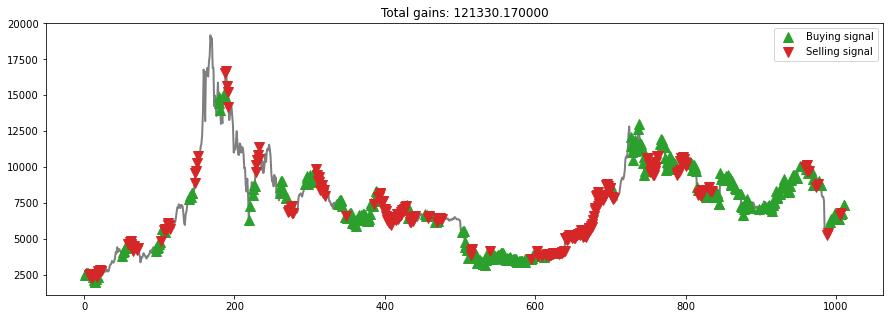

INFO:tensorflow:Assets written to: model_ep8/assets
Running episode 9/10
Buy: $2399.21
Buy: $2490.60
Buy: $2625.06
Sell: $2578.16 | Profit: $178.95
Sell: $2623.05 | Profit: $132.45
Sell: $2590.63 | Profit: -$34.43
Buy: $2719.31
Buy: $3092.25
Buy: $3231.49
Buy: $3447.19
Buy: $3381.56
Buy: $3328.91
Buy: $3421.45
Sell: $3659.14 | Profit: $939.83
Sell: $4047.47 | Profit: $955.22
Sell: $3975.17 | Profit: $743.68
Sell: $4408.51 | Profit: $961.32
Sell: $4078.46 | Profit: $696.90
Sell: $4271.64 | Profit: $942.73
Sell: $4266.98 | Profit: $845.53
Buy: $3956.08
Buy: $3800.01
Buy: $3359.98
Buy: $3709.85
Buy: $3657.61
Buy: $3798.74
Buy: $3820.00
Buy: $3694.23
Buy: $3616.10
Buy: $3780.46
Buy: $3748.76
Buy: $3906.72
Buy: $3933.36
Buy: $4183.45
Buy: $4058.73
Buy: $4182.89
Buy: $4293.03
Buy: $4396.60
Buy: $4408.25
Buy: $4290.00
Buy: $4175.02
Buy: $4324.11
Buy: $4362.14
Buy: $4437.48
Buy: $4622.78
Buy: $4773.10
Buy: $4738.91
Sell: $4846.99 | Profit: $890.91
Sell: $5712.47 | Profit: $1912.46
Sell: $5667.

Sell: $7153.05 | Profit: $1999.42
Sell: $7009.43 | Profit: $1692.46
Sell: $7973.21 | Profit: $2642.71
Sell: $8057.12 | Profit: $2592.79
Sell: $8247.34 | Profit: $2508.39
Sell: $7295.47 | Profit: $1533.12
Sell: $7388.93 | Profit: $1760.13
Buy: $7954.01
Buy: $7899.50
Buy: $7666.31
Sell: $8209.98 | Profit: $255.97
Sell: $8640.00 | Profit: $740.50
Sell: $9005.00 | Profit: $1338.69
Buy: $9176.51
Buy: $9270.94
Buy: $9131.12
Sell: $9335.38 | Profit: $158.87
Sell: $9743.40 | Profit: $472.46
Sell: $10590.84 | Profit: $1459.72
Buy: $10533.46
Buy: $10596.18
Buy: $10626.59
Buy: $10234.12
Buy: $9636.47
Buy: $10121.72
Buy: $9708.52
Sell: $10131.20 | Profit: -$402.26
Sell: $9466.06 | Profit: -$1130.12
Sell: $9622.65 | Profit: -$1003.94
Sell: $9424.51 | Profit: -$809.61
Sell: $9689.92 | Profit: $53.45
Sell: $10020.96 | Profit: -$100.76
Sell: $10351.99 | Profit: $643.47
Buy: $10775.01
Sell: $11589.84 | Profit: $814.83
Buy: $10419.11
Buy: $10630.07
Buy: $10574.37
Buy: $10664.47
Buy: $10346.12
Sell: $105

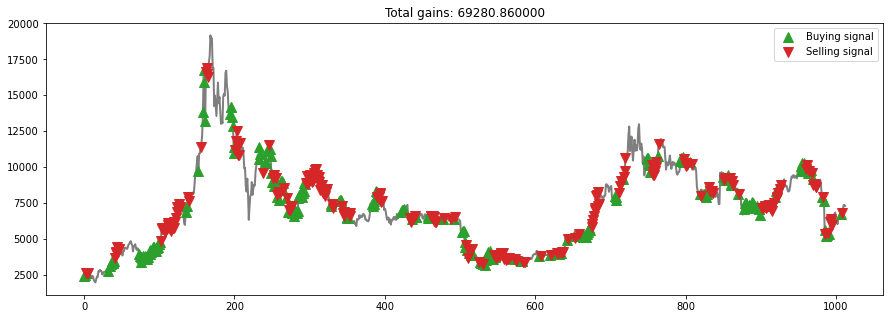

Running episode 10/10
Buy: $2578.16
Sell: $2623.05 | Profit: $44.89
Buy: $2565.49
Buy: $2506.57
Buy: $2313.48
Buy: $2264.37
Sell: $2411.64 | Profit: -$153.85
Buy: $2317.13
Buy: $2095.00
Buy: $2015.91
Buy: $1952.26
Buy: $2166.67
Buy: $2357.18
Buy: $2330.01
Buy: $2731.27
Buy: $2709.99
Buy: $2826.35
Buy: $2755.54
Buy: $2748.73
Buy: $2503.77
Buy: $2544.32
Sell: $2673.34 | Profit: $166.77
Sell: $2693.67 | Profit: $380.19
Sell: $2701.27 | Profit: $436.90
Sell: $2715.67 | Profit: $398.54
Sell: $2864.56 | Profit: $769.56
Sell: $2731.16 | Profit: $715.25
Sell: $2719.31 | Profit: $767.05
Sell: $2783.59 | Profit: $616.92
Sell: $3092.25 | Profit: $735.07
Sell: $3203.30 | Profit: $873.29
Sell: $3231.49 | Profit: $500.22
Sell: $3447.19 | Profit: $737.20
Sell: $3381.56 | Profit: $555.21
Sell: $3328.91 | Profit: $573.37
Sell: $3421.45 | Profit: $672.72
Sell: $3659.14 | Profit: $1155.37
Sell: $4047.47 | Profit: $1503.15
Buy: $4599.17
Buy: $4625.01
Sell: $4760.02 | Profit: $160.85
Sell: $4828.33 | Profi

Buy: $10574.37
Buy: $10664.47
Buy: $10346.12
Sell: $10566.01 | Profit: -$8.36
Buy: $10307.94
Buy: $10311.07
Buy: $10083.83
Buy: $10110.81
Buy: $10393.16
Buy: $10313.00
Buy: $10330.06
Buy: $10316.55
Buy: $10250.00
Buy: $10213.55
Buy: $9814.55
Buy: $10129.84
Buy: $9974.22
Sell: $8184.56 | Profit: -$2479.91
Sell: $8318.12 | Profit: -$2028.00
Sell: $8293.00 | Profit: -$2014.94
Buy: $8319.15
Sell: $8157.99 | Profit: -$2153.08
Buy: $7970.35
Sell: $8071.61 | Profit: -$2012.22
Buy: $7952.75
Sell: $7914.32 | Profit: -$2196.49
Buy: $8233.71
Sell: $8219.16 | Profit: -$2174.00
Sell: $7957.67 | Profit: -$2355.33
Sell: $7420.27 | Profit: -$2909.79
Sell: $7420.27 | Profit: -$2896.28
Sell: $9600.00 | Profit: -$650.00
Sell: $9175.00 | Profit: -$1038.55
Sell: $9637.32 | Profit: -$177.23
Sell: $9302.20 | Profit: -$827.64
Buy: $9287.96
Buy: $9109.13
Sell: $9086.98 | Profit: -$887.24
Sell: $9260.94 | Profit: $941.79
Sell: $9346.57 | Profit: $1376.22
Buy: $9153.97
Sell: $9317.56 | Profit: $1364.81
Sell: $92

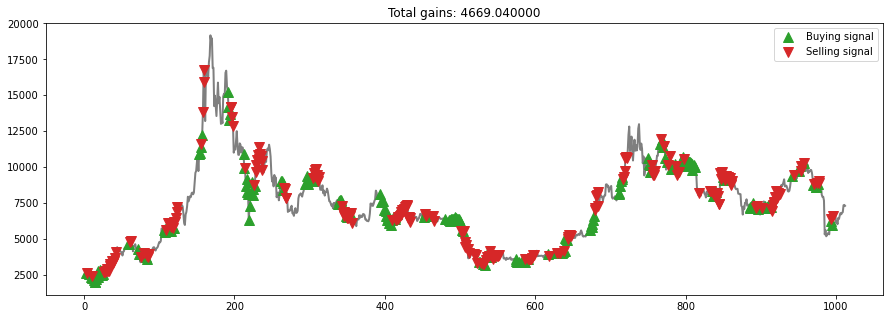

INFO:tensorflow:Assets written to: model_ep10/assets


In [18]:
window_size = 1
agent = Agent(window_size)
data = X_train
l = len(data) - 1
batch_size = 32
episode_count = 10


for e in range(episode_count + 1):
    print("Running episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)
    #set_trace()
    total_profit = 0
    agent.inventory = []
    states_sell = []
    states_buy = []
    for t in range(l):
        action = agent.act(state)    
        # sit
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0

        if action == 1: # buy
            agent.inventory.append(data[t])
            states_buy.append(t)
            print("Buy: " + formatPrice(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = agent.inventory.pop(0)      
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            states_sell.append(t)
            print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

        done = True if t == l - 1 else False
        
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
            #set_trace()
            pd.DataFrame(np.array(agent.memory)).to_csv("Agent"+str(e)+".csv")
            #Chart to show how the model performs with going up and down for each 
            plot_behavior(data,states_buy, states_sell, total_profit, str(e))
        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)    
            

    if e % 2 == 0:
        agent.model.save("model_ep" + str(e))

In [22]:
#Deep Q-Learning Model
print(agent.model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
test_data = X_test
l_test = len(test_data) - 1
state = getState(test_data, 0, window_size + 1)
total_profit = 0
is_eval = True
done = False
states_sell_test = []
states_buy_test = []

#Get the trained model
# model_name = "model_ep"+str(episode_count)
model_name = "model_ep8"
agent = Agent(window_size, is_eval, model_name)
state = getState(data, 0, window_size + 1)
total_profit = 0
agent.inventory = []

Buy: $7181.24
Buy: $6922.02
Buy: $6819.05
Buy: $6688.22
Sell: $6903.82 | profit: -$277.42
Sell: $6911.93 | profit: -$10.09
Buy: $6661.49
Sell: $7095.71 | profit: $276.66
Sell: $7104.85 | profit: $416.63
Sell: $7247.14 | profit: $585.65
Buy: $7180.39
Buy: $6868.43
Sell: $6876.85 | profit: -$303.54
Sell: $7126.88 | profit: $258.45
Buy: $7531.40
Sell: $7575.10 | profit: $43.70
Buy: $7719.16
Sell: $7828.44 | profit: $109.28
Buy: $8670.00
Sell: $8838.82 | profit: $168.82
Buy: $8733.73
Sell: $8866.02 | profit: $132.29
Buy: $9874.08
Buy: $8641.42
Sell: $8705.73 | profit: -$1168.35
Sell: $8723.37 | profit: $81.95
Buy: $9432.45
Sell: $9543.68 | profit: $111.23
Buy: $9518.31
Sell: $9722.01 | profit: $203.70
Buy: $9465.20
Buy: $8980.03
Sell: $9287.48 | profit: -$177.72
Buy: $9205.97
Buy: $8786.30
Sell: $8898.77 | profit: -$81.26
Buy: $8825.24
Sell: $9167.35 | profit: -$38.62
Sell: $9515.67 | profit: $729.37
Buy: $9387.92
Sell: $9585.16 | profit: $759.92
Buy: $9548.60
Sell: $10101.00 | profit: $71

Sell: $37655.54 | profit: -$2915.44
Sell: $37963.61 | profit: -$447.53
Buy: $37419.82
Buy: $36025.16
Sell: $36397.50 | profit: -$566.02
Buy: $32843.15
Sell: $32898.06 | profit: -$2420.80
Sell: $36982.83 | profit: -$689.64
Buy: $36784.37
Buy: $35591.29
Buy: $34877.30
Sell: $38988.50 | profit: $2485.19
Sell: $40429.38 | profit: $5624.09
Buy: $40043.69
Buy: $38875.00
------------------------------------------
Total Profit: $90701.67
------------------------------------------


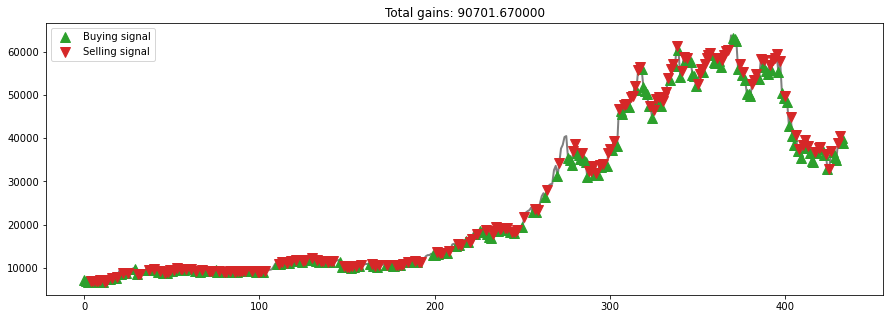

In [51]:
for t in range(l_test):
    action = agent.act(state)
    #print(action)
    #set_trace()
    next_state = getState(test_data, t + 1, window_size + 1)
    reward = 0

    if action == 1:
        agent.inventory.append(test_data[t])
        states_buy_test.append(t)
        print("Buy: " + formatPrice(test_data[t]))

    elif action == 2 and len(agent.inventory) > 0:
        bought_price = agent.inventory.pop(0)
        reward = max(test_data[t] - bought_price, 0)
        #reward = test_data[t] - bought_price
        total_profit += test_data[t] - bought_price
        states_sell_test.append(t)
        print("Sell: " + formatPrice(test_data[t]) + " | profit: " + formatPrice(test_data[t] - bought_price))

    if t == l_test - 1:
        done = True
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state

    if done:
        print("------------------------------------------")
        print("Total Profit: " + formatPrice(total_profit))
        print("------------------------------------------")
        
plot_behavior(test_data,states_buy_test, states_sell_test, total_profit, 'test')

In [42]:
X_test[0]

7181.24

In [43]:
bitcoin_subset.iloc[1013,]

Open      7291.990000
High      7366.280000
Low       7115.040000
Close     7181.240000
Volume    2248.290853
Name: 2020-04-09, dtype: float64